In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#DATA CLEANING



df = pd.read_csv("Car_Insurance_Claim.csv")

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

df['CREDIT_SCORE'] = pd.to_numeric(df['CREDIT_SCORE'], errors='coerce')
df['ANNUAL_MILEAGE'] = pd.to_numeric(df['ANNUAL_MILEAGE'], errors='coerce')

for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].mean())

df.drop(columns='Unnamed: 0', inplace=True)
df

#TO ANALIZE

df_outcome_1 = df[df["OUTCOME"] == '1.0']
df_outcome_0 = df[df["OUTCOME"] == '0.0']



In [4]:
#DESCRIPTIVE STATISTICS

print("Mean of table where outcome = 1\n", df_outcome_1.drop(
    columns='ID').mean(numeric_only=True))
print("\n\n")
print("Mode of table where outcome = 1\n", df_outcome_1.drop(
    columns='ID').mode().iloc[0]
)
print("\n\n")
print("Mean of table where outcome = 0\n", df_outcome_0.drop(
    columns='ID').mean(numeric_only=True))
print("\n\n")
print("Mode of table where outcome = 0\n", df_outcome_0.drop(
    columns='ID').mode().iloc[0]
)


Mean of table where outcome = 1
 CREDIT_SCORE          0.456245
ANNUAL_MILEAGE    12411.770635
dtype: float64



Mode of table where outcome = 1
 AGE                          16-25
GENDER                        male
RACE                      majority
DRIVING_EXPERIENCE            0-9y
EDUCATION              high school
INCOME                     poverty
CREDIT_SCORE              0.515816
VEHICLE_OWNERSHIP              0.0
VEHICLE_YEAR           before 2015
MARRIED                        0.0
CHILDREN                       1.0
POSTAL_CODE                  10238
ANNUAL_MILEAGE             13000.0
VEHICLE_TYPE                 sedan
SPEEDING_VIOLATIONS              0
DUIS                             0
PAST_ACCIDENTS                   0
OUTCOME                        1.0
Name: 0, dtype: object



Mean of table where outcome = 0
 CREDIT_SCORE          0.542839
ANNUAL_MILEAGE    11380.209536
dtype: float64



Mode of table where outcome = 0
 AGE                          40-64
GENDER           

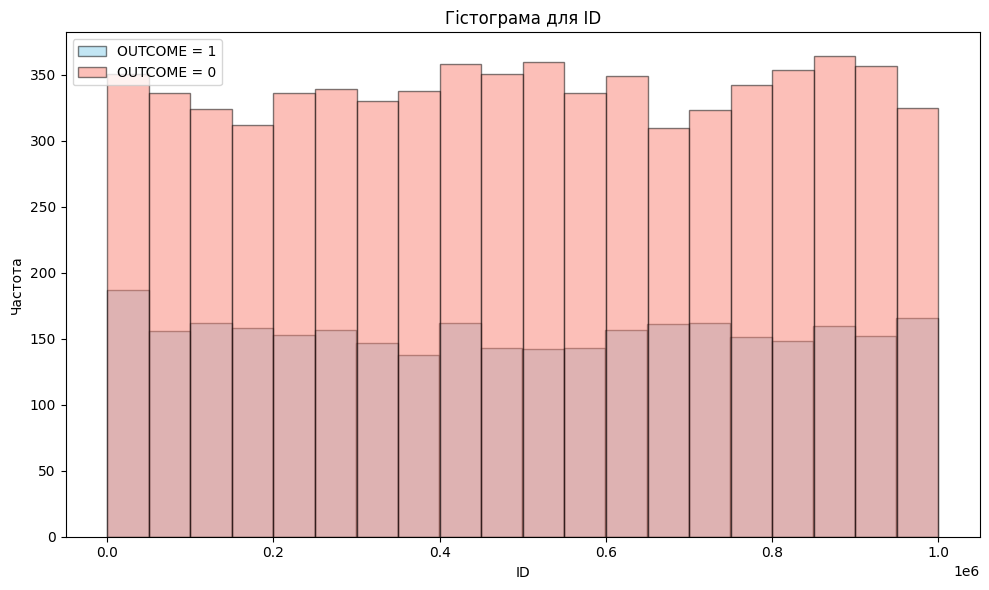

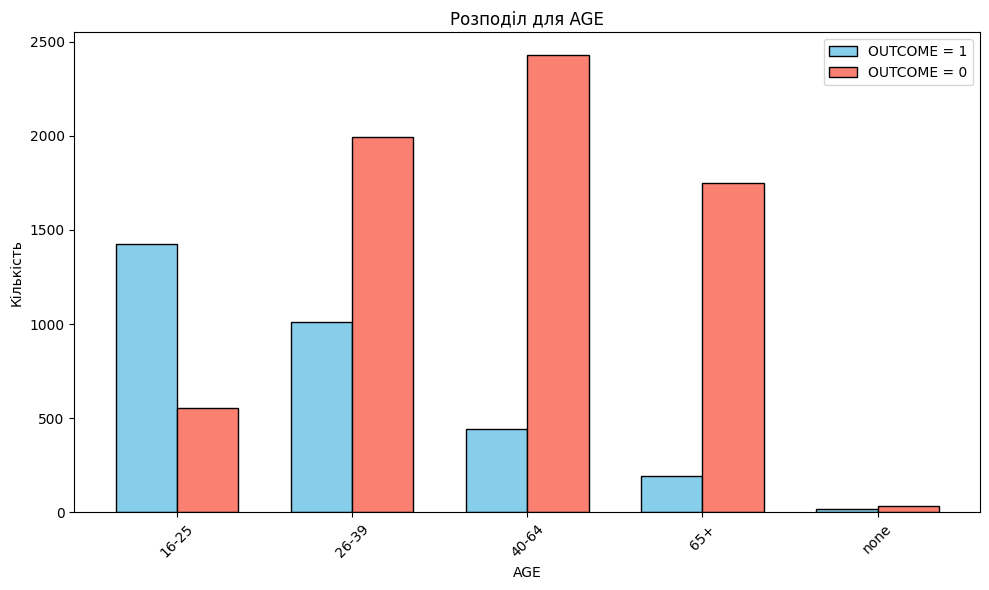

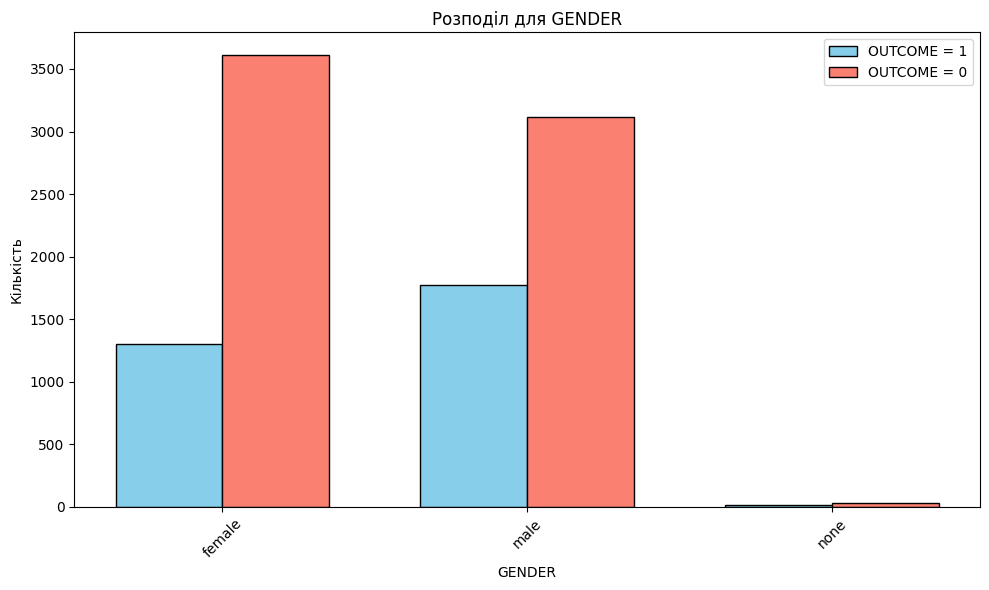

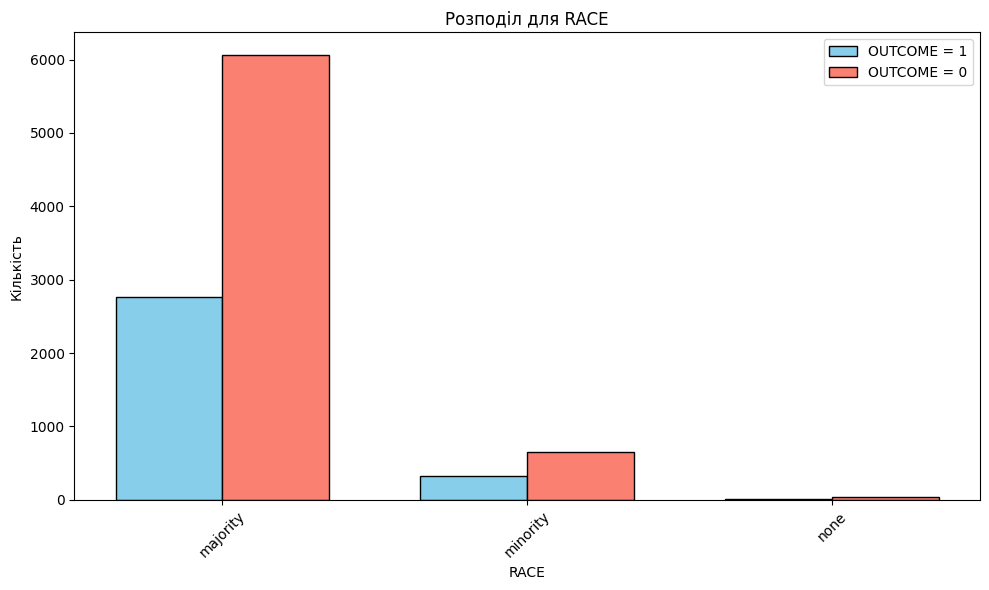

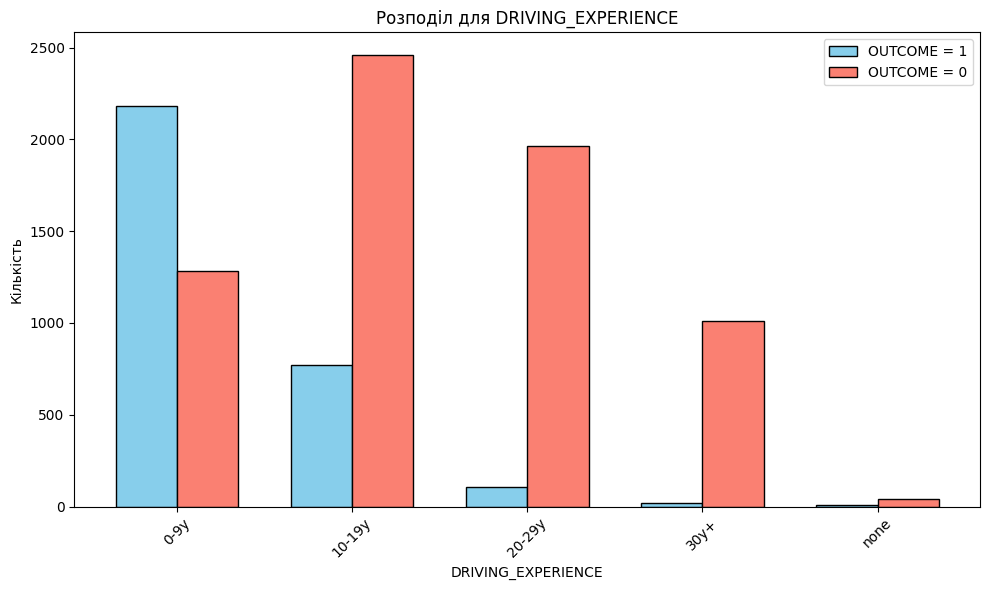

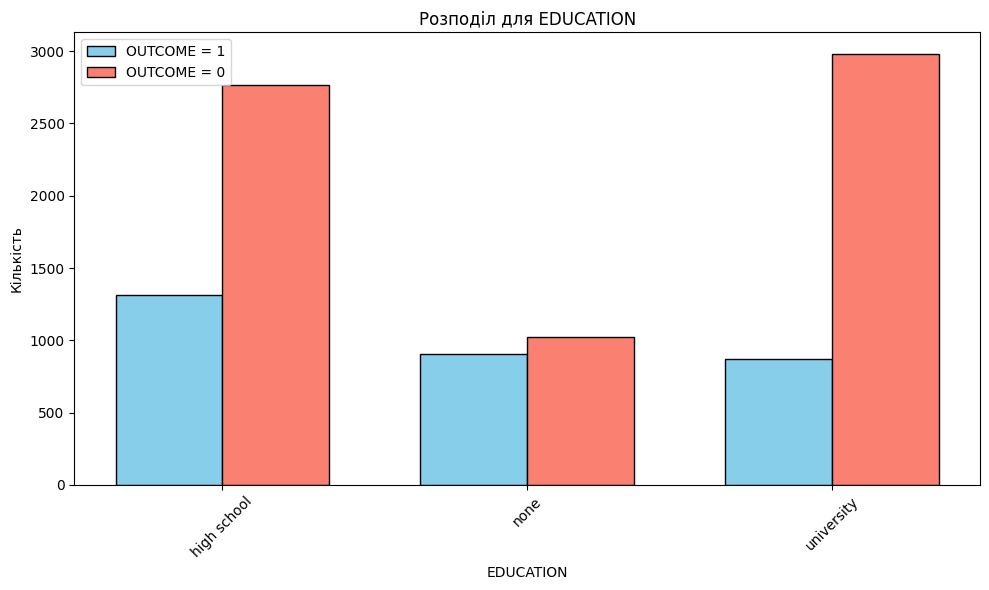

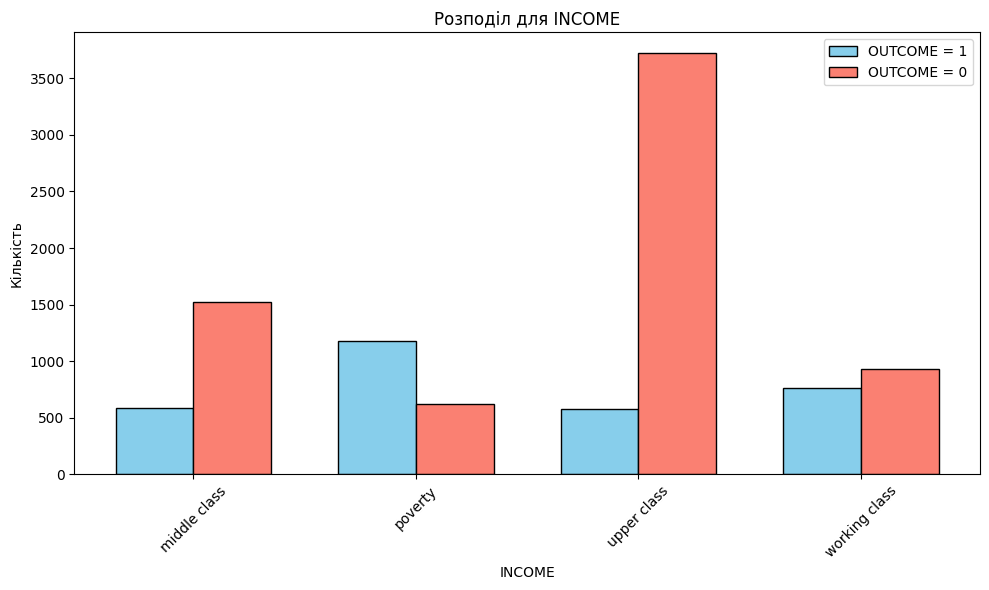

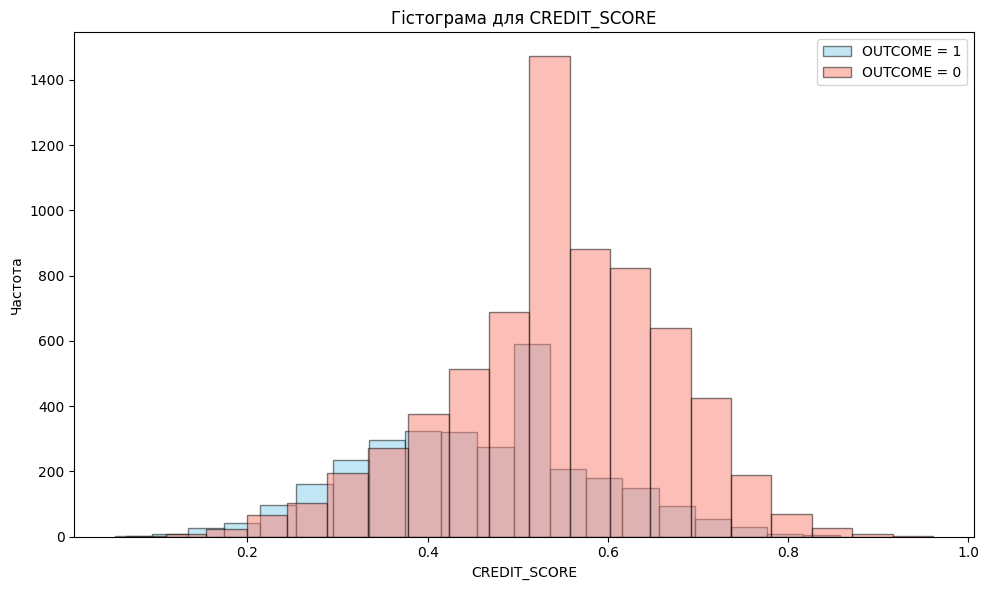

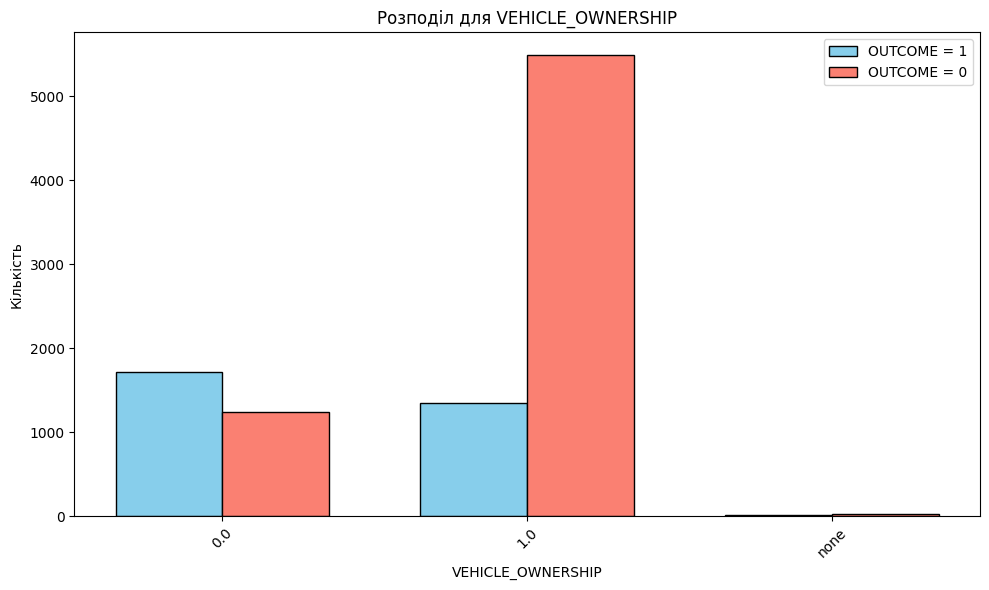

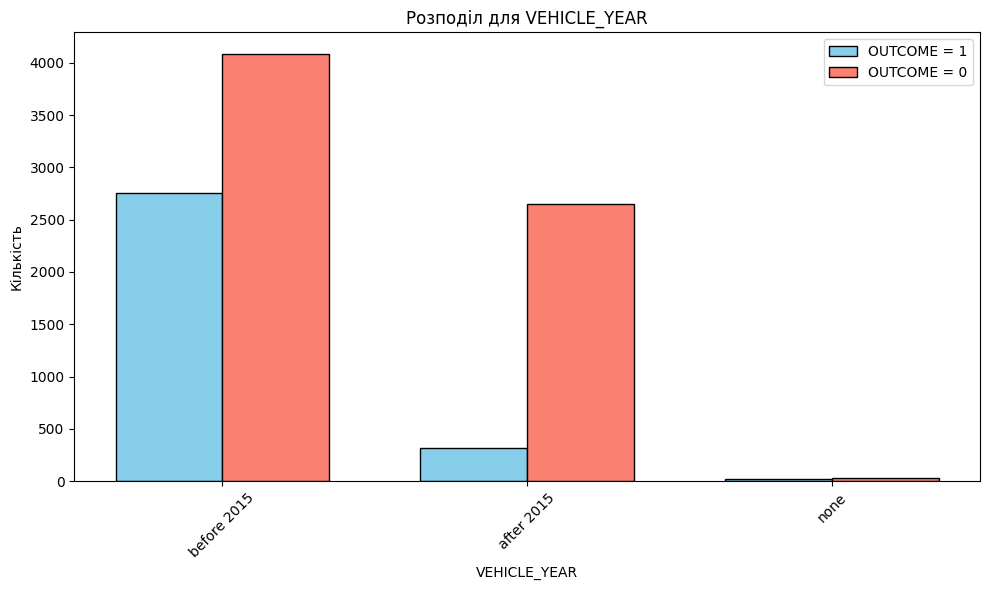

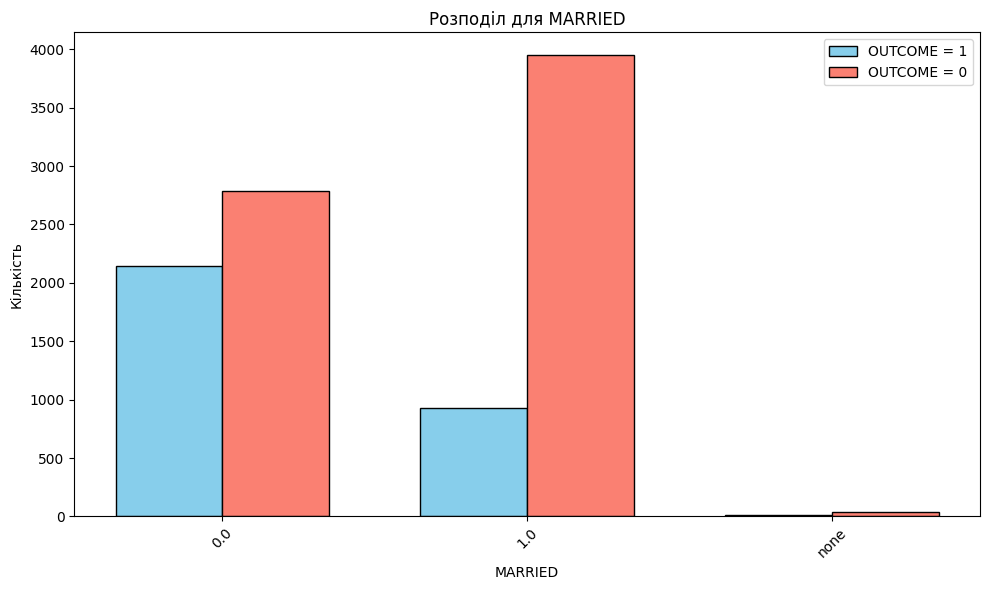

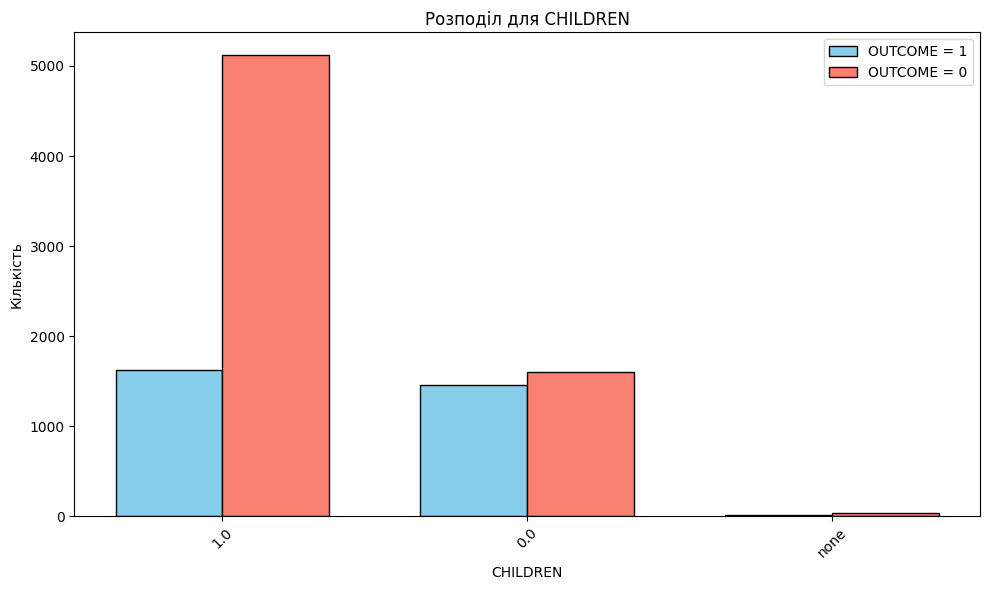

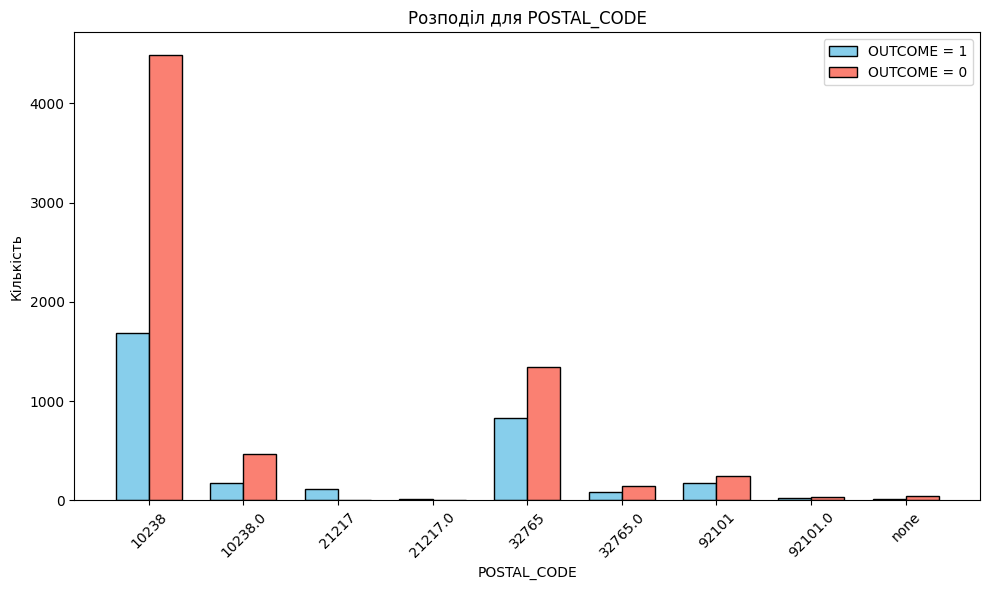

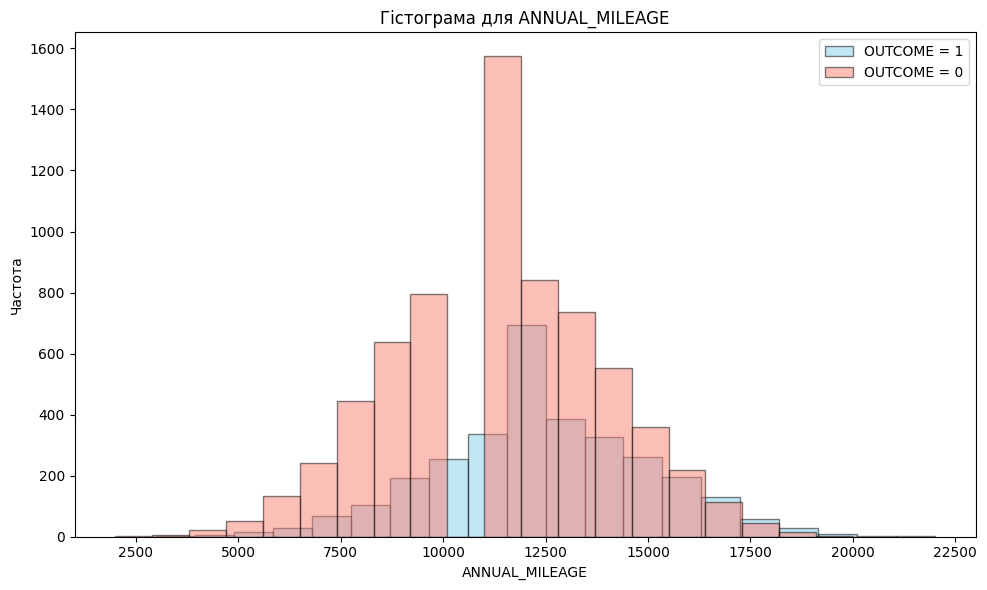

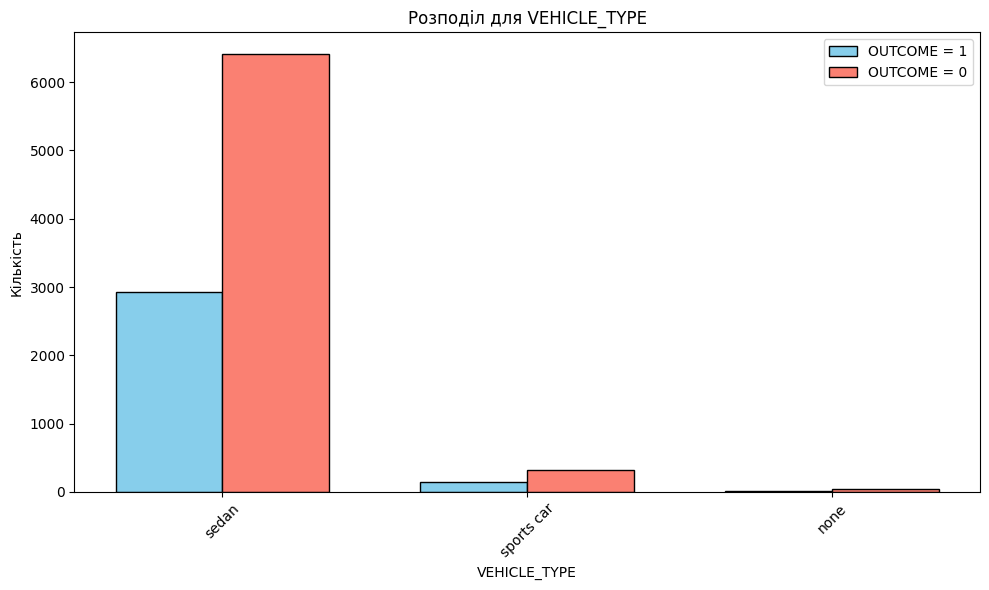

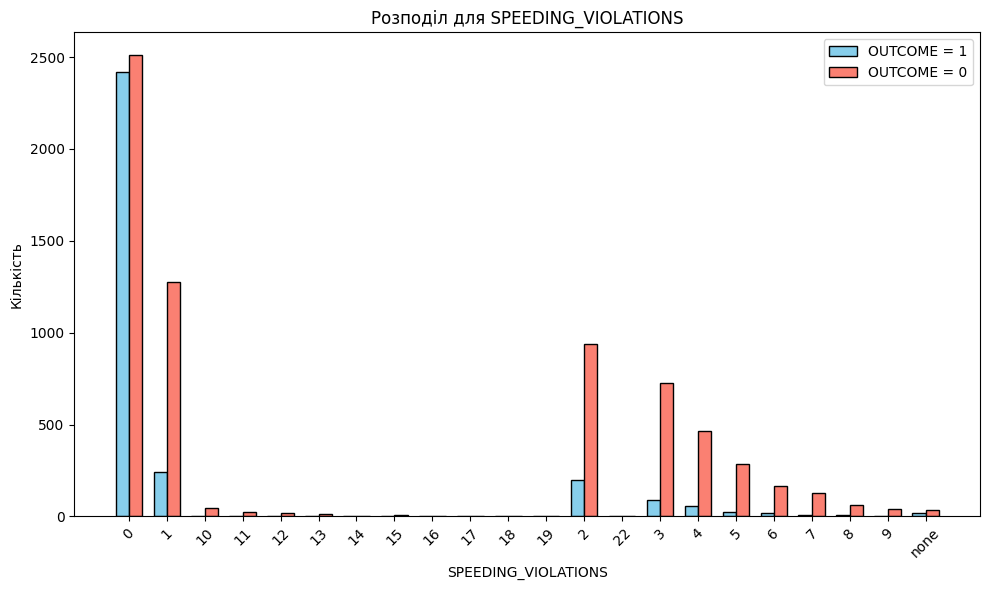

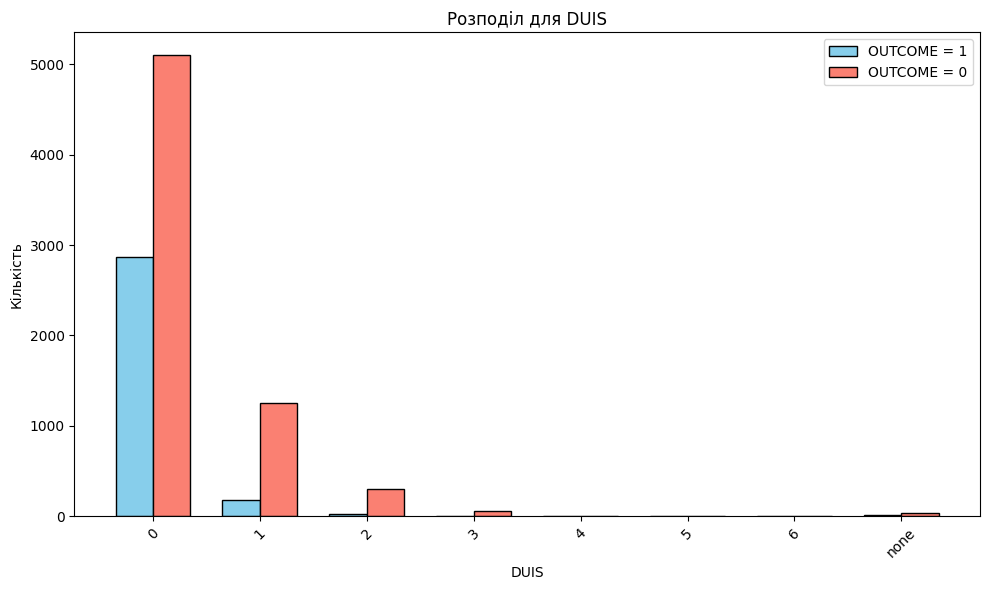

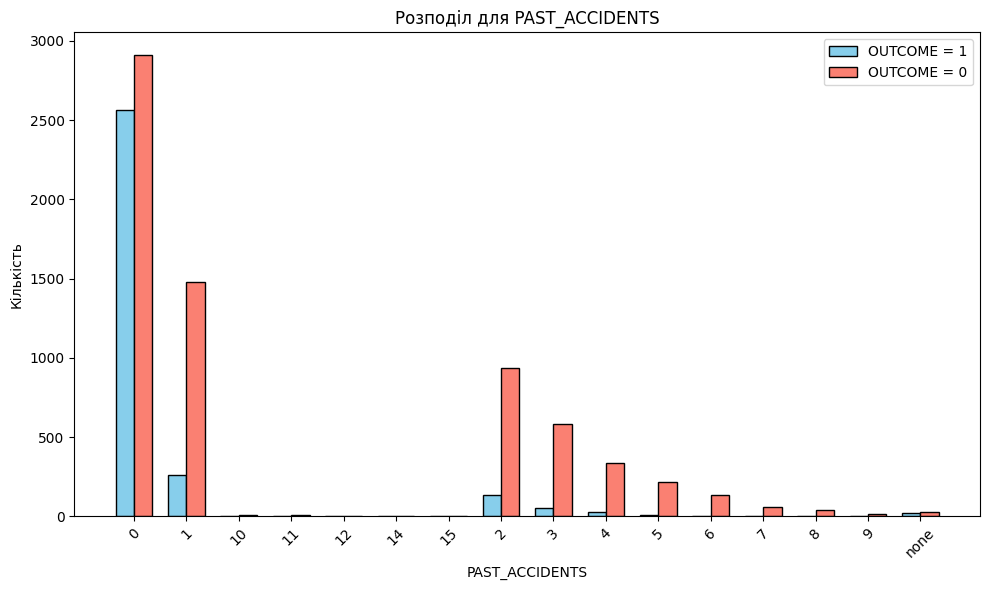

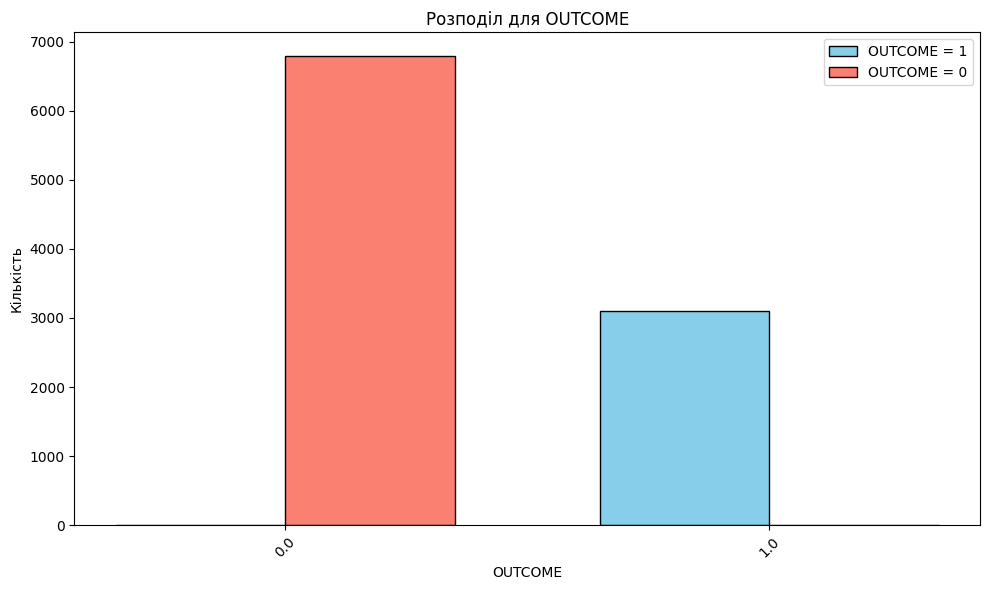

In [ ]:
#VIZUALISATION
all_cols = df.columns
for col in all_cols:
    plt.figure(figsize=(10, 6))
    
    if pd.api.types.is_numeric_dtype(df[col]):
        
        plt.hist(df_outcome_1[col].dropna(), bins=20, alpha=0.5, 
                 label='OUTCOME = 1', color='skyblue', edgecolor='black')
        plt.hist(df_outcome_0[col].dropna(), bins=20, alpha=0.5, 
                 label='OUTCOME = 0', color='salmon', edgecolor='black')
        plt.title(f'Гістограма для {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
        plt.legend()
    
   
    else:
        counts_1 = df_outcome_1[col].value_counts()
        counts_0 = df_outcome_0[col].value_counts()
        all_categories = counts_1.index.union(counts_0.index)
        counts_1 = counts_1.reindex(all_categories, fill_value=0)
        counts_0 = counts_0.reindex(all_categories, fill_value=0)
        index = range(len(all_categories))
        width = 0.35
        plt.bar(index, counts_1, width=width, label='OUTCOME = 1', 
                color='skyblue', edgecolor='black')
        plt.bar([i + width for i in index], counts_0, width=width, 
                label='OUTCOME = 0', color='salmon', edgecolor='black')
        plt.xticks([i + width/2 for i in index], all_categories, rotation=45)
        plt.title(f'Розподіл для {col}')
        plt.xlabel(col)
        plt.ylabel('Кількість')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

In [ ]:
#CONCLUSION
#MOST OF CLIENTS WITH 0 OUTCOME DO NOT HAVE A LARGE DRIVING EXPERIENCE, THEY 
#ARE MORE LIKELY TO DRIVE SAFETLY, BECAUSE THEY HAVE NO DRIVING EXPERIENCE.
#THE BIGGEST PART OF BLUE CLIENTS SUFFERS FROM POVERTY, THE DON'T HAVE MONEY
#TO PAY FOR TRABLES THEY CREATE
#COMPANY SHOULD SEARCH FOR THOSE WHO STARTED DRIVING RECENTLY, AND THOSE WHO
#DO NOT HAVE ENOUGH MONEY TO BRIBE A POLICEMAN OR A JUDGE